In [61]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam
from dataset import pro_encoder, hhblits_encoder, na_encoder, shhblits_encoder
from model import Trans, MLPRegressor, CNNRegressor, LSTMRegressor, BLSTMRegressor
import pandas as pd
import math, os
from tqdm import tqdm

In [62]:
batch_size = 16
root_dir = "data/"
hhblits_dir = root_dir+"hhblits/"
dataset = []
for i in ['train']:
    filename = root_dir + i +'.csv'
    df = pd.read_csv(filename)
    id = df.iloc[:,0].values.tolist(); na_seq = df.iloc[:,14].values.tolist()
    mut_seq = df.iloc[:,2].values.tolist(); ori_seq = df.iloc[:,4].values.tolist()
    
    pro_ori = pro_encoder(ori_seq); pro_ori = torch.tensor(pro_ori, dtype=torch.float)
    pro_mut = pro_encoder(mut_seq); pro_mut = torch.tensor(pro_mut, dtype=torch.float)
    na = na_encoder(na_seq); na = torch.tensor(na, dtype=torch.float)
    hhb_ori, hhb_mut = hhblits_encoder(hhblits_dir,id)
    hhb_ori, hhb_mut = torch.tensor(hhb_ori, dtype=torch.float), torch.tensor(hhb_mut, dtype=torch.float)
    
    y = df['ddG(kcal/mol)'].values.tolist(); y = torch.tensor(y, dtype=torch.float)
    dataset.append(TensorDataset(pro_ori, pro_mut, hhb_ori, hhb_mut, na, y))

In [63]:
test_dataset = dataset[0]
print(len(test_dataset))
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)
loss_fn = nn.MSELoss()
model = Trans().cuda()

900


In [64]:
# test_mse = 0.
# test_result = []
# model.load_state_dict(torch.load('/data/personal/liangjs/result_rna/trans.pth'))
# model.eval()
# for X_ori, X_mut, X_orihhb, X_muthhb, X_na, y in tqdm(test_loader):
#     X_mut = X_mut.cuda(); X_muthhb = X_muthhb.cuda()
#     X_ori = X_ori.cuda(); X_orihhb = X_orihhb.cuda()
#     X_na = X_na.cuda()
#     y = y.cuda()
#     preds = model(X_ori, X_mut, X_orihhb, X_muthhb, X_na)
#     loss = loss_fn(preds.ravel(), y)
#     test_result.append(y.tolist())
#     test_result.append(preds.squeeze(1).tolist())
#     test_mse += loss.item()*len(y)
# test_mse = test_mse/len(test_dataset)
# test_rmse = math.sqrt(test_mse)
# test_result.append(test_rmse)

# file_name = 'result/trans_test_result.txt'
# f = open(file_name,'w')
# for i in test_result:
#     f.write(str(i).strip('[').strip(']')+', ')
# f.close()
# print(test_rmse)

In [65]:
import pandas as pd

In [87]:
test = pd.read_csv('./data/preprocess/train.csv')
label = test.loc[:,'ddG(kcal/mol)'].values.T.tolist()
for i in range(len(label)):
    if label[i]<1:
        label[i] = 0
    else:
        label[i] = 1
label

[0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,


In [67]:
from model import Trans_vec
import numpy as np
model = Trans_vec().cuda()
# model = torch.nn.DataParallel(model).cuda()

# test
test_emb = np.memmap('/data/personal/liangjs/test.dat', dtype='float32', mode='w+', shape=(len(test_dataset),256))
model.load_state_dict(torch.load('/data/personal/liangjs/result_rna/trans.pth'))
model.eval()
i=0
for X_ori, X_mut, X_orihhb, X_muthhb, X_na, y in tqdm(test_loader):
    X_mut = X_mut.cuda(); X_muthhb = X_muthhb.cuda()
    X_ori = X_ori.cuda(); X_orihhb = X_orihhb.cuda()
    X_na = X_na.cuda()
    y = y.cuda()
    preds = model(X_ori, X_mut, X_orihhb, X_muthhb, X_na)
    test_emb[i:i+len(X_ori)] = preds.detach().cpu().numpy()
    i += len(X_ori)

100%|██████████| 57/57 [00:04<00:00, 11.83it/s]


In [68]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold, datasets, preprocessing

In [89]:
X = test_emb
y = np.array(label)
y

array([0, 0, 1, ..., 1, 0, 1])

In [88]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
X_tsne = tsne.fit_transform(X)

In [90]:
scaler = preprocessing.MinMaxScaler()
result = scaler.fit_transform(X_tsne)

900


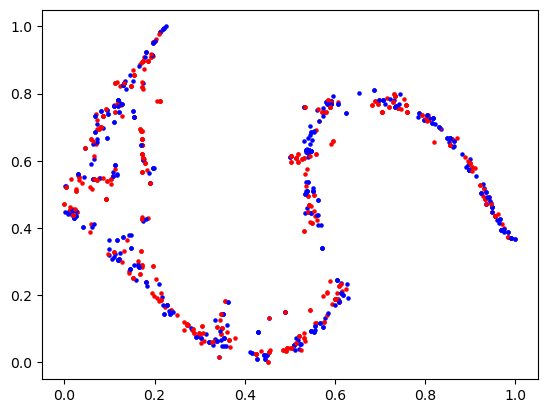

In [99]:
from sklearn import preprocessing
color = ['r', 'b']
plt.figure()
print(len(result))
sample = np.random.randint(900,size=900)
for i in sample:
    if y[i] == 0:
        plt.scatter(result[i,0], result[i,1], color='r', s=5)
    else:
        plt.scatter(result[i,0], result[i,1], color='b', s=5)